# 1. Image Classification using CNN

(1) 모듈 불러오기

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt
import numpy as np

(2) 데이터셋 불러오기

In [ ]:
train_set = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(train_set, batch_size=8,
                                          shuffle=True)

test_set = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_set, batch_size=8,
                                         shuffle=False)

#데이터 클래스
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


(3) 데이터 확인

plane horse  deer truck  deer  deer  frog   car


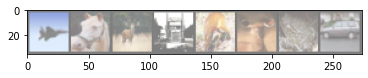

In [ ]:
# 이미지를 보여주기 위한 함수
def img_show(img):
    img = img / 2 + 0.5     # unnormalize
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)))


# 학습용 이미지를 무작위로 가져오기
dataiter = iter(train_loader)
images, labels = dataiter.next()

# 라벨과 이미지 보여주기
img_show(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(8)))
plt.show()

(4) CNN 모델 정의하기

In [ ]:
# input data: 32 * 32 * 3
# convolution size 계산: (input size - kernel size + 2*padding) / (stride) + 1
# CNN 세션 자료 바로가기: https://github.com/YonseiESC/ESC-22WINTER/blob/main/week4/Convolutional%20Neural%20Networks_%20WEEK4.pdf

# 모델 개요: (컨볼루션 - activation - 풀링) x 2 ->> (       ) ->> fc1 - relu1 - fc2 - relu2 - fc3

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size = 5) # 28 * 28 * 6
        self.pool = nn.MaxPool2d(kernel_size = 2, stride = 2, padding = 0) # 14 * 14 * 6 # 5 * 5 * 16
        self.conv2 = nn.Conv2d(6, 16, 5) # 10 * 10 * 16
        self.fc1 = nn.Linear(5 * 5 * 16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

# https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html
# https://pytorch.org/docs/1.9.1/generated/torch.nn.MaxPool2d.html
# https://pytorch.org/docs/stable/generated/torch.nn.Linear.html
# https://pytorch.org/docs/stable/generated/torch.Tensor.view.html

(5) Loss와 Optimizer 정의하기

In [ ]:
# SGD optimizer with learning rate = 0.01, momentum = 0.9
# cross-entropy loss

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

# https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html
# https://pytorch.org/docs/stable/optim.html

(6) 모델 학습

In [ ]:
for epoch in range(10):  # Iterate many times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data

        # Set gradient as 0
        optimizer.zero_grad()

        # Forward + Backpropatation + Optimization
        outputs = net(inputs)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        # Print the training loss
        running_loss += loss.item()
        if i % 1000 == 999:    # print every 1000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 1000))
            running_loss = 0.0

print('Finished Training')

# 로컬 미니멈에 빠져버린걸까?

[1,  1000] loss: 2.212
[1,  2000] loss: 1.949
[1,  3000] loss: 1.845
[1,  4000] loss: 1.768
[1,  5000] loss: 1.737
[1,  6000] loss: 1.739
[2,  1000] loss: 1.740
[2,  2000] loss: 1.691
[2,  3000] loss: 1.726
[2,  4000] loss: 1.708
[2,  5000] loss: 1.698
[2,  6000] loss: 1.682
[3,  1000] loss: 1.641
[3,  2000] loss: 1.655
[3,  3000] loss: 1.680
[3,  4000] loss: 1.651
[3,  5000] loss: 1.694
[3,  6000] loss: 1.668
[4,  1000] loss: 1.643
[4,  2000] loss: 1.669
[4,  3000] loss: 1.672
[4,  4000] loss: 1.660
[4,  5000] loss: 1.684
[4,  6000] loss: 1.690
[5,  1000] loss: 1.639
[5,  2000] loss: 1.638
[5,  3000] loss: 1.672
[5,  4000] loss: 1.648
[5,  5000] loss: 1.659
[5,  6000] loss: 1.665
[6,  1000] loss: 1.646
[6,  2000] loss: 1.646
[6,  3000] loss: 1.838
[6,  4000] loss: 1.721
[6,  5000] loss: 1.673
[6,  6000] loss: 1.699
[7,  1000] loss: 1.661
[7,  2000] loss: 1.638
[7,  3000] loss: 1.697
[7,  4000] loss: 1.705
[7,  5000] loss: 1.727
[7,  6000] loss: 1.686
[8,  1000] loss: 1.720
[8,  2000] 

(7) 모델 테스트

GroundTruth:    cat  ship  ship plane  frog  frog   car  frog
Predicted:  truck  ship truck  ship   dog truck truck horse


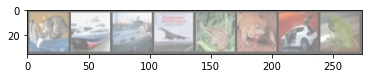

In [ ]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

# print images
plt.show()
img_show(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(8)))

outputs = net(images)
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(8)))

(8) 정답률 계산

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Hint : Find the condition in classification problem

print('네트워크의 정확도: {} %'.format(
    100 * correct / total))

# 성능도 처참,,,

네트워크의 정확도: 37.55 %


# 2. Time Series Data processing using RNN

(1) 모듈 import

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns

(2) 데이터 로드

In [ ]:
# Import csv file from your drive.
from google.colab import files 
uploaded = files.upload()

# Make sure the your file name matches.
import io 
df = pd.read_csv(io.BytesIO(uploaded['kospi.csv']))

Saving kospi.csv to kospi (1).csv


(3) 데이터 확인

In [ ]:
# Before preprocessing the dataframe, we need to check if there exists any missing value. 
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
df.head(10)

# 우리의 목적: 5일간의 'Open','High','Low','Volume' 데이터를 가지고, 6일째의 'Close' 가격을 예측하기!!

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-30,2183.489990,2206.199951,2177.879883,2206.199951,2206.199951,480400
1,2019-01-31,2222.879883,2222.879883,2201.219971,2204.850098,2204.850098,545200
2,2019-02-01,2211.929932,2218.780029,2201.409912,2203.459961,2203.459961,479400
3,2019-02-07,2215.770020,2215.790039,2196.770020,2203.419922,2203.419922,427800
4,2019-02-08,2192.010010,2192.479980,2171.959961,2177.050049,2177.050049,391000
5,2019-02-11,2180.540039,2181.580078,2167.360107,2180.729980,2180.729980,406100
6,2019-02-12,2182.709961,2195.050049,2178.590088,2190.469971,2190.469971,429900
7,2019-02-13,2200.000000,2203.709961,2194.750000,2201.479980,2201.479980,422000
8,2019-02-14,2195.919922,2225.850098,2186.090088,2225.850098,2225.850098,573400
9,2019-02-15,2210.939941,2210.939941,2187.709961,2196.090088,2196.090088,400600


(4) 데이터 전처리

In [ ]:
scaler = MinMaxScaler()
df[['Open','High','Low','Close','Volume']] = scaler.fit_transform(df[['Open','High','Low','Close','Volume']])

X = df[['Open','High','Low','Volume']].values  # input feature
y = df['Close'].values # output 

def seq_dataset(x, y, seq_length):
  x_seq = []
  y_seq = []
  for i in range(len(x) - seq_length):
    x_seq.append(x[i:i+seq_length])
    y_seq.append(y[i+seq_length])

  return torch.FloatTensor(x_seq), torch.FloatTensor(y_seq).view(-1,1)
  # We need to convert the lists to Pytorch tensor.
  # Convert the dimension of y to be two-dimensional, since we will use MSELoss, which deals with two-dimensional target.
  # https://pytorch.org/docs/stable/tensors.html 
  # https://pytorch.org/docs/stable/generated/torch.Tensor.view.html

split = 300
seq_length = 5

# Split dat for train-test.
x_seq, y_seq = seq_dataset(X, y, seq_length)
x_train_seq = x_seq[:split]
y_train_seq = y_seq[:split]
x_test_seq = x_seq[split:]
y_test_seq = y_seq[split:]

print(x_train_seq.size(), y_train_seq.size())
print(x_test_seq.size(), y_test_seq.size())

torch.Size([300, 5, 4]) torch.Size([300, 1])
torch.Size([126, 5, 4]) torch.Size([126, 1])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  


In [ ]:
## 데이터가 어떤식으로 가공된건지 확인해봅시다
print(x_train_seq[0]) # 예측에 사용할 input data
y_train_seq[0] # 예측하고자 하는 output data(target)

tensor([[0.7229, 0.7324, 0.7455, 0.2421],
        [0.7631, 0.7501, 0.7691, 0.2748],
        [0.7519, 0.7457, 0.7693, 0.2416],
        [0.7558, 0.7425, 0.7646, 0.2156],
        [0.7316, 0.7178, 0.7395, 0.1971]])


tensor([0.7334])

(5) 모델 구성

In [ ]:
# Now, it's time for the real game, Neural Network Setting. We will emply LSTM model in this case.
input_size = x_seq.size(2) # What is the number of input variables? # feature
hidden_size = 8 
num_layers = 2
output_size = 1 # prediction 개수(종가)

class Net(nn.Module):
  # The order of the four parameters below is related to the general structure of deep learning.
  def __init__(self, input_size, hidden_size, output_size, num_layers):
    super(Net, self).__init__()
    self.rnn = torch.nn.LSTM(input_size = input_size, hidden_size = hidden_size, num_layers=num_layers, batch_first=True)
    self.fc = torch.nn.Linear(hidden_size, output_size, bias=True)

    # https://pytorch.org/docs/1.9.1/generated/torch.nn.LSTM.html
    # https://pytorch.org/docs/stable/generated/torch.nn.Linear.html

  def forward(self, x):
    x, _status = self.rnn(x)
    x = self.fc(x[:, -1])
    return x

LSTM = Net(input_size, hidden_size, output_size, 1)

(6) Loss와 Optimizer 설정

In [ ]:
# Take MSE and Adam as loss and optimizer respectively (with learning rate 0.01)
criterion = torch.nn.MSELoss()
optimizer = optim.Adam(LSTM.parameters(), lr = 0.01)

#https://pytorch.org/docs/stable/optim.html

(7) 모델 학습 및 검증

epoch: 0 loss: 0.1330655
epoch: 10 loss: 0.0274889
epoch: 20 loss: 0.0148155
epoch: 30 loss: 0.0109977
epoch: 40 loss: 0.0094225
epoch: 50 loss: 0.0073030
epoch: 60 loss: 0.0046060
epoch: 70 loss: 0.0021169
epoch: 80 loss: 0.0017498
epoch: 90 loss: 0.0015797
epoch: 100 loss: 0.0015174
epoch: 110 loss: 0.0014733
epoch: 120 loss: 0.0014330
epoch: 130 loss: 0.0014004
epoch: 140 loss: 0.0013665
epoch: 150 loss: 0.0013335
epoch: 160 loss: 0.0013000
epoch: 170 loss: 0.0012664
epoch: 180 loss: 0.0012328
epoch: 190 loss: 0.0011994
epoch: 200 loss: 0.0011663
epoch: 210 loss: 0.0011337
epoch: 220 loss: 0.0011020
epoch: 230 loss: 0.0010713
epoch: 240 loss: 0.0010419
epoch: 250 loss: 0.0010140
epoch: 260 loss: 0.0009880
epoch: 270 loss: 0.0009640
epoch: 280 loss: 0.0009422
epoch: 290 loss: 0.0009228
epoch: 300 loss: 0.0009059
epoch: 310 loss: 0.0008912
epoch: 320 loss: 0.0008789
epoch: 330 loss: 0.0008685
epoch: 340 loss: 0.0008599
epoch: 350 loss: 0.0008528
epoch: 360 loss: 0.0008468
epoch: 370 l

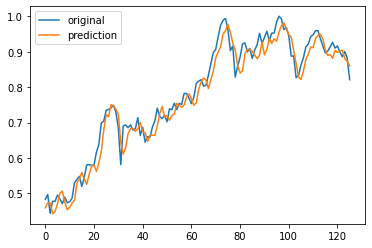

In [ ]:
#Set the number of iterations for optimization process.
num_iteration = 500

for i in range(num_iteration+1):
  optimizer.zero_grad() # Why do we include this line?
  outputs = LSTM(x_train_seq)
  loss = criterion(outputs, y_train_seq) 
  loss.backward()
  optimizer.step()
  if i % 10 == 0:
    print('epoch: %d loss: %.7f' %(i, loss.item()))

# Compare the original and predicted price values via visualization. 
plt.plot(y_test_seq)
plt.plot(LSTM(x_test_seq).data.numpy())
plt.legend(['original', 'prediction'])
plt.show()  